In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

In [2]:
ROOT_PATH = Path('/content/drive/My Drive/DL/Project/experiments/fminst/')
DATA_FOLDER = ROOT_PATH/'per_samples_results/'
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Confusion Matrix


Confusion matrix, without normalization
[[856   1   6  21   3   1 109   0   3   0]
 [  5 970   1  18   2   0   2   0   2   0]
 [ 11   1 786  13 100   0  88   0   1   0]
 [ 16   6   6 899  42   0  27   0   4   0]
 [  1   0 106  31 786   0  75   0   1   0]
 [  0   0   0   0   0 974   0  18   0   8]
 [151   1  76  31  67   1 662   0  11   0]
 [  0   0   0   0   0  18   0 965   0  17]
 [  0   1   1   3   3   0   8   6 978   0]
 [  0   0   0   0   0   7   0  37   1 955]]


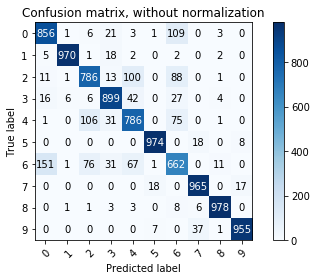

In [3]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


df1 = pd.read_csv(DATA_FOLDER/'per_sample_results_baseline_seed_0.csv')
df1['true_label'] = df1['true_label'].astype(int)
df1['predicted_label'] = df1['predicted_label'].astype(int)
# confusion_matrix(df['true_label'], df['predicted_label'])
plot_confusion_matrix(df1['true_label'] ,df1['predicted_label'], classes=np.arange(10),
                      title='Confusion matrix, without normalization')
plt.show() 

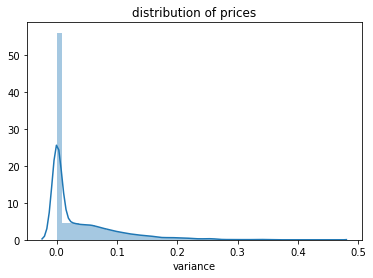

In [4]:
sns.distplot(df1['variance'])
plt.title('distribution of prices')
plt.show()

# Scatterplot

In [0]:
df1['round_p_true_label'] = df1['p_true_label'].round(2)
plot_data = df1.groupby('round_p_true_label').agg(mean_std=('variance', 'mean'),counts=('variance', 'size')).reset_index()

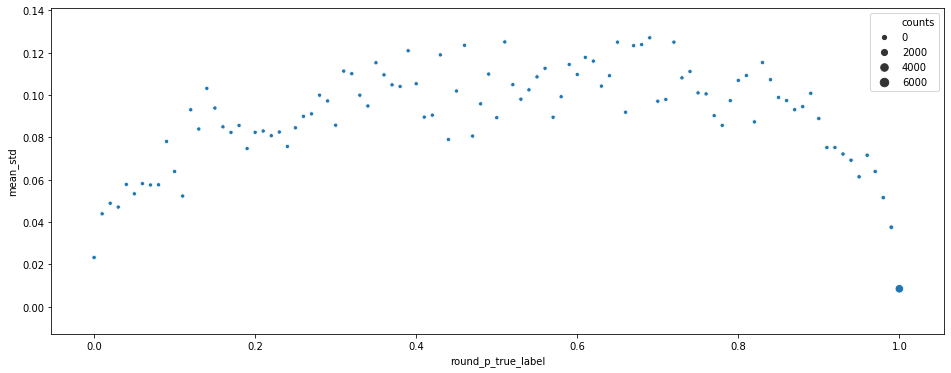

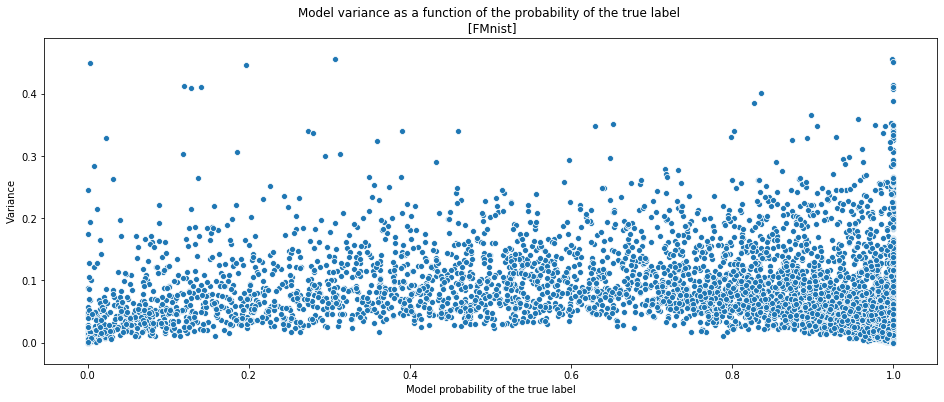

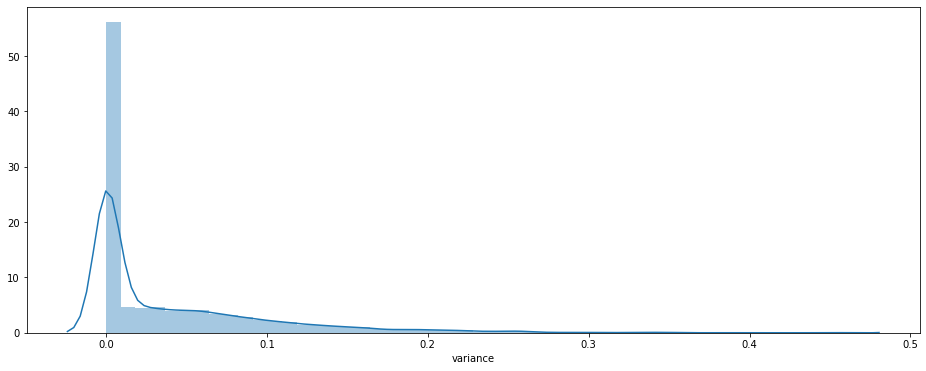

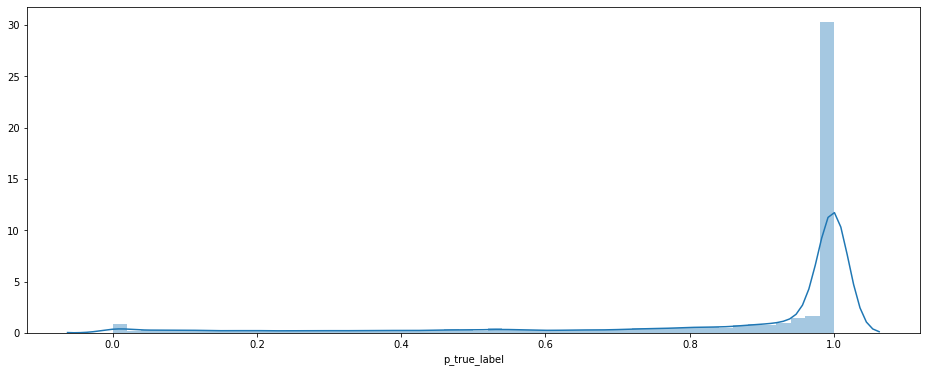

In [6]:
# means
plt.figure(figsize=(16, 6))
sns.scatterplot(x="round_p_true_label", y="mean_std",size = "counts",data=plot_data)
plt.show()

# all
plt.figure(figsize=(16, 6))
sns.scatterplot(x="p_true_label", y="variance",data=df1).set(xlabel = 'Model probability of the true label',ylabel = 'Variance', title = "Model variance as a function of the probability of the true label \n [FMnist]")
plt.savefig(ROOT_PATH / 'prediction variance as a function of p true label.png')
plt.show()

plt.figure(figsize=(16, 6))
sns.distplot(df1['variance'])
# plt.title('distribution of prices')
plt.show()

plt.figure(figsize=(16, 6))
sns.distplot(df1['p_true_label'])
# plt.title('distribution of prices')
plt.show()

In [7]:
# largest variance for confused labels
df1.nlargest(1000,'variance')['true_label'].value_counts()

4    185
6    164
0    159
2    153
3    146
7     47
1     41
9     38
8     38
5     29
Name: true_label, dtype: int64

# Results mean and std accuracy

In [0]:
from glob import glob

In [0]:
file_paths = {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
results =  {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
paths = [Path(path) for path in glob("/content/drive/My Drive/DL/Project/experiments/fminst/per_samples_results/c*")]
for path in paths:
  file_paths[str(path.stem.split('_')[2])].append(path)

In [10]:
for key,path_list in file_paths.items():
  for i,path in enumerate(path_list):
    results[key].append(float(pd.read_csv(file_paths[key][i]).iloc[34].values[-1][7:-1]))

for key in results.keys():
  result = np.array(results[key])
  print(F"{key} mean : {np.mean(result)} , std : {np.std(result)}")

baseline mean : 0.87867 , std : 0.0035766045350304125
SGD-WPV mean : 0.8841300000000001 , std : 0.002976592011008555
MCdropout mean : 0.88516 , std : 0.0021527656630483598
entropy mean : 0.8852399999999999 , std : 0.0030093853192969503


[]

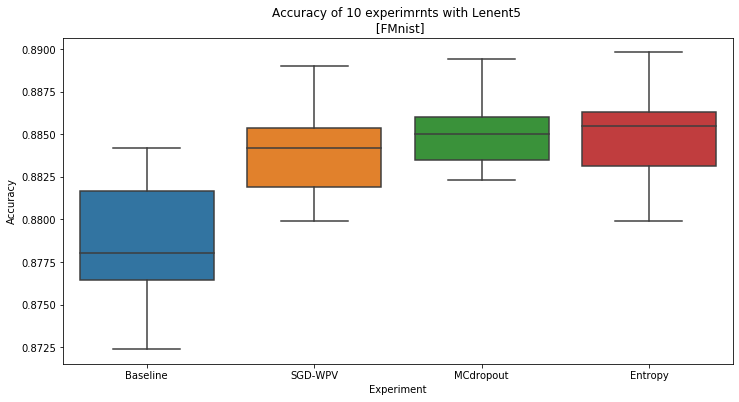

In [11]:
to_plot = pd.DataFrame(results)
to_plot.columns = ['Baseline','SGD-WPV', 'MCdropout','Entropy']
to_plot = to_plot.melt()
to_plot.columns = ['Experiment', 'Accuracy']
plt.figure(figsize=(12, 6))
sns.boxplot(x="Experiment", y="Accuracy", data=to_plot).set(title = "Accuracy of 10 experimrnts with Lenent5 \n [FMnist]")
plt.savefig(ROOT_PATH / 'Accuracy of 10 experimrnts with Lenent5.png')
plt.plot()

In [12]:
from scipy import stats
t_test = pd.DataFrame(results)
stats.ttest_ind(t_test['baseline'],t_test['SGD-WPV'])

Ttest_indResult(statistic=-3.520163880434621, pvalue=0.002444760461179366)

In [13]:
stats.f_oneway(t_test['SGD-WPV'],t_test['MCdropout'],t_test['entropy'])

F_onewayResult(statistic=0.4588419974368999, pvalue=0.6368528408464185)

In [0]:
file_paths = {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
results =  {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
paths = [Path(path) for path in glob("/content/drive/My Drive/DL/Project/experiments/fminst/per_samples_results/p*")]
for path in paths:
  file_paths[str(path.stem.split('_')[3])].append(path)

In [15]:
pd.read_csv(file_paths['MCdropout'][0])

,true_label,p_true_label,variance,predicted_label
0,3.0,0.999991,0.003151,3.0
1,1.0,1.000000,0.000010,1.0
2,9.0,1.000000,0.000011,9.0
3,4.0,0.295825,0.176600,2.0
4,9.0,1.000000,0.000276,9.0
...,...,...,...,...
9995,0.0,0.999189,0.381047,0.0
9996,8.0,1.000000,0.065026,8.0
9997,1.0,1.000000,0.000010,1.0
9998,6.0,0.590759,0.193764,6.0


In [0]:
for key,path_list in file_paths.items():
  for i,path in enumerate(path_list):
    results[key].append(float(pd.read_csv(file_paths[key][i])['variance'].mean()))

In [17]:
for key in results.keys():
  result = np.array(results[key])
  print(F"{key} mean : {np.mean(result)} , std : {np.std(result)}")

baseline mean : 0.04051271582703063 , std : 0.0013995895352723223
SGD-WPV mean : 0.04091066249990784 , std : 0.0020644775579525417
MCdropout mean : 0.09102982567440675 , std : 0.006276164749477671
entropy mean : 0.03938513577969879 , std : 0.0018476451990812207


[]

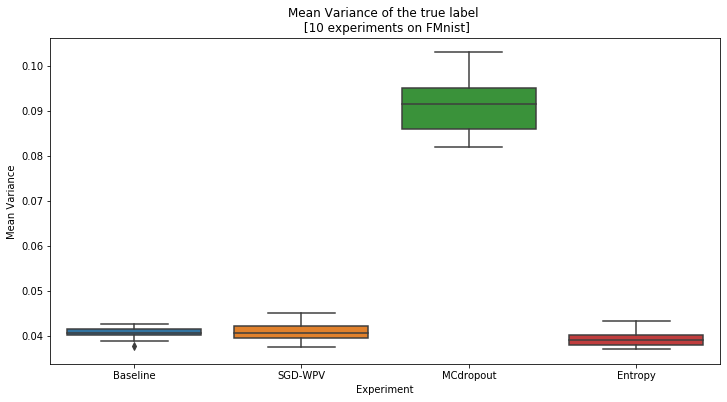

In [18]:
to_plot = pd.DataFrame(results)
to_plot.columns = ['Baseline','SGD-WPV', 'MCdropout','Entropy']
to_plot = to_plot.melt()
to_plot.columns = ['Experiment', 'Mean Variance']
plt.figure(figsize=(12, 6))
sns.boxplot(x="Experiment", y="Mean Variance", data=to_plot).set(title = "Mean Variance of the true label \n [10 experiments on FMnist]")
plt.savefig(ROOT_PATH / 'Mean Variance of the true label.png')
plt.plot()

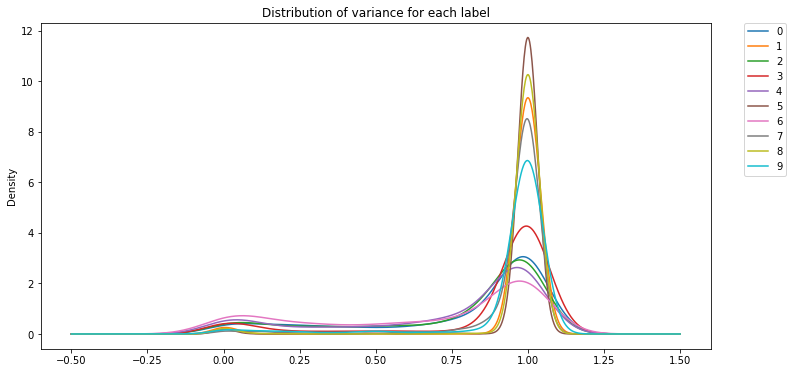

In [28]:
plt.figure(figsize=(12, 6))
df = pd.read_csv(file_paths['MCdropout'][0])
for l in np.arange(0,10,1):
  df[df["true_label"]==l]['p_true_label'].plot.kde(label=l)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Distribution of variance for each label')
plt.show()

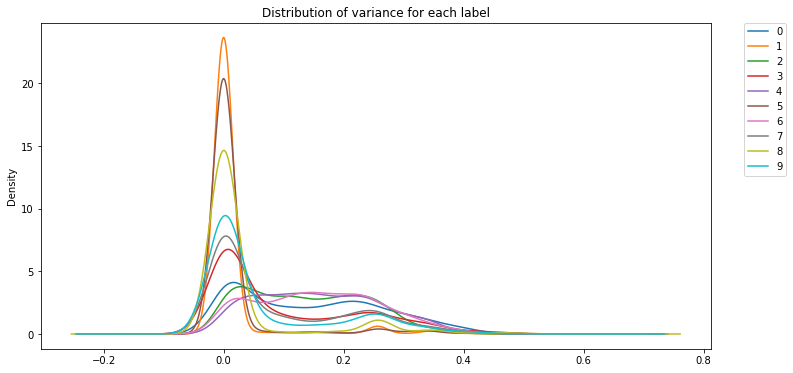

In [31]:
plt.figure(figsize=(12, 6))
df = pd.read_csv(file_paths['MCdropout'][0])
for l in np.arange(0,10,1):
  df[df["true_label"]==l]['variance'].plot.kde(label=l)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Distribution of variance for each label')
plt.show()

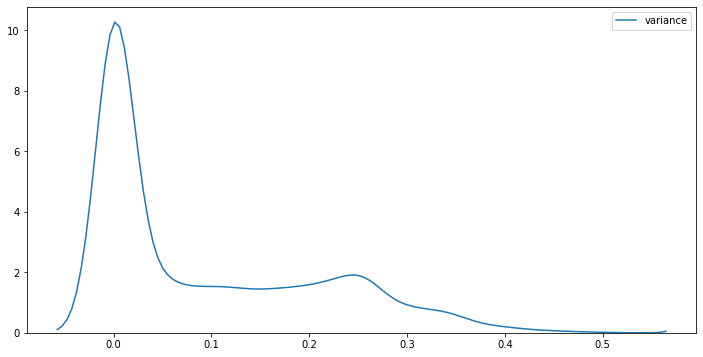

In [36]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df["variance"])

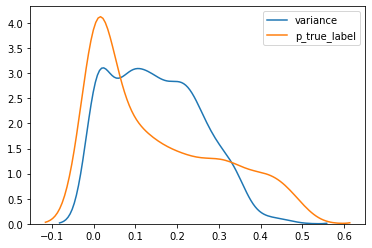

In [39]:
sns.kdeplot(df[df['predicted_label']!= df['true_label']]["variance"])
sns.kdeplot(df[df['predicted_label']!= df['true_label']]["p_true_label"])

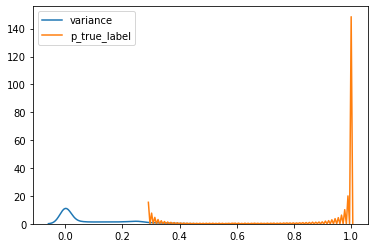

In [40]:
sns.kdeplot(df[df['predicted_label']== df['true_label']]["variance"])
sns.kdeplot(df[df['predicted_label']== df['true_label']]["p_true_label"])